In [16]:
from scipy import stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
p=stats.chi2.cdf(7.78,4)
p

np.float64(0.9000222578744849)

In [3]:
p2=stats.chi2.cdf(18.31,10)
1-p2

np.float64(0.04995416634369676)

In [4]:
pf=stats.f.cdf(1.83,10,np.inf)
1-pf

np.float64(1.0)

In [5]:
# code by chat

from scipy import stats
import numpy as np

# Chi-squared calculation
p2 = 1 - stats.chi2.cdf(18.31, 10)

# F-distribution calculation (with infinite df2)
pf = 1 - stats.f.cdf(1.83, 10, np.inf)

print(p2, pf)


0.04995416634369676 1.0


# Assignment 4

1. Suppose a fair dice is rolled once. Let the random variable X denote the outcome of
a single throw. Calculate the probability distribution and the cumulative probability
distribution of X. Plot these functions.

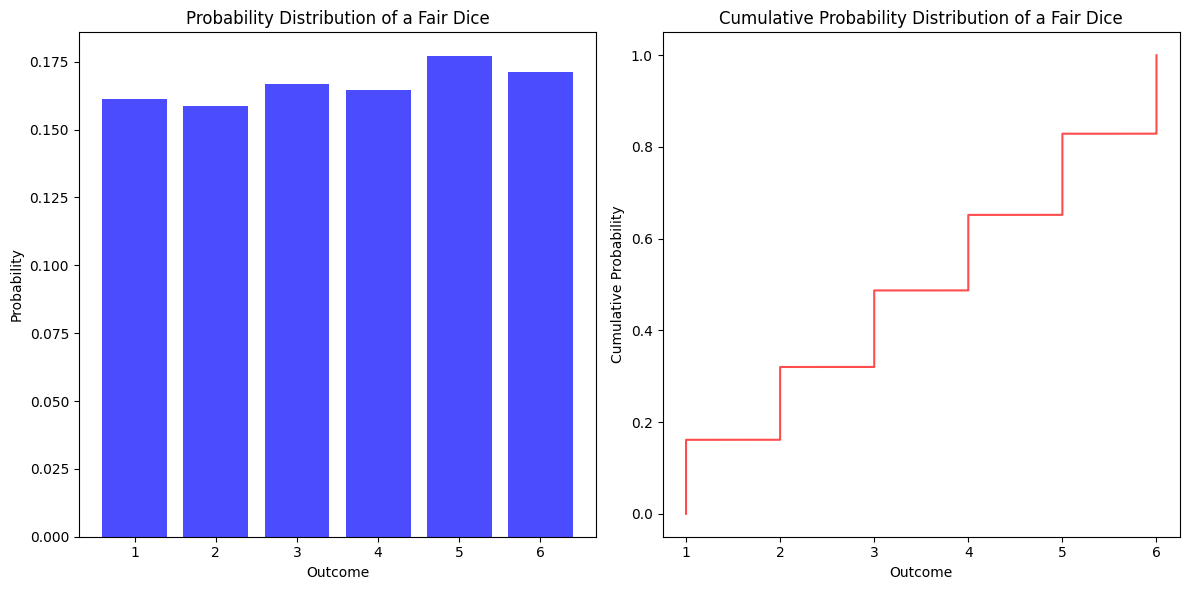

The mean of the distribution is 3.5504444444444445
The variance of the distribution is 2.9143442469135805


In [6]:
def fair_dice(throws):
    outcomes = np.random.randint(1, 7, throws)
    prob = np.full(6, 1/6)
    
    sorted_outcomes = np.sort(outcomes)
    cp = np.cumsum(np.ones_like(sorted_outcomes) / throws)

    mean = np.mean(outcomes)
    variance = np.var(outcomes)  # Calculate variance

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    values, counts = np.unique(outcomes, return_counts=True)
    plt.bar(values, counts / throws, color='blue', alpha=0.7)
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.title('Probability Distribution of a Fair Dice')

    plt.subplot(1, 2, 2)
    plt.step(sorted_outcomes, cp, where='mid', color='red', alpha=0.7)
    plt.xlabel('Outcome')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Probability Distribution of a Fair Dice')

    plt.tight_layout()
    plt.show()
    
    print(f'The mean of the distribution is {mean}')
    print(f'The variance of the distribution is {variance}')  # Print variance

fair_dice(9000)

2. Suppose we toss a fair coin 200 times. Let obtaining a head be considered a success.
X ∼ B(n = 200, p = 0.35). Calculate P(X = 5). Calculate P(4 ≤ X ≤ 9). Calculate
the cumulative prob of X and plot the cumulative distribution function of X.

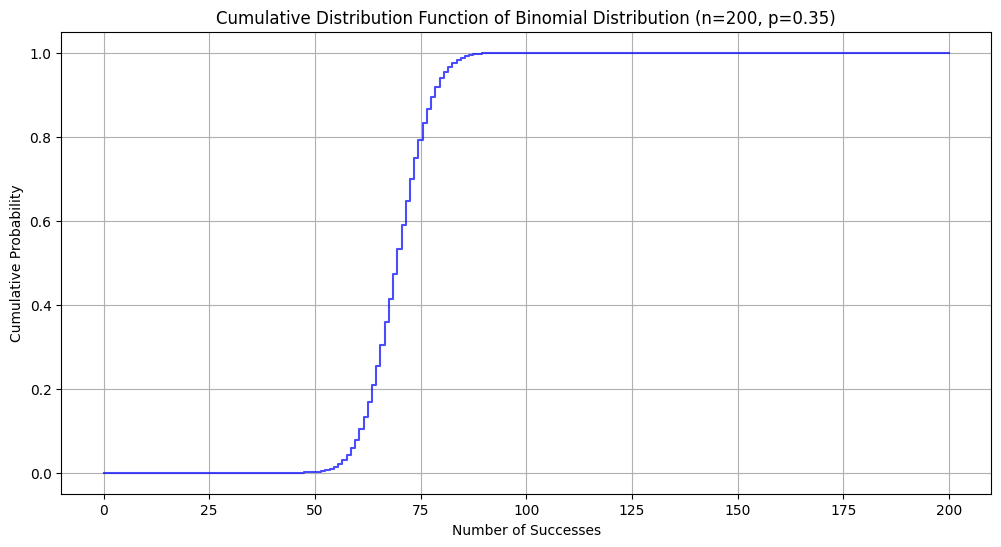

(np.float64(4.390703199830213e-30), np.float64(1.8722976688239635e-25))

In [8]:
# Parameters for the binomial distribution
n = 200
p = 0.35


P_X_5 = stats.binom.pmf(5, n, p)


P_4_to_9 = stats.binom.cdf(9, n, p) - stats.binom.cdf(3, n, p)

x = np.arange(0, n+1)
cp = stats.binom.cdf(x, n, p)

plt.figure(figsize=(12, 6))
plt.step(x, cp, where='mid', color='blue', alpha=0.7)
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of Binomial Distribution (n=200, p=0.35)')
plt.grid(True)
plt.show()

P_X_5, P_4_to_9

3. Calculate E(X) for question 1 by hand. Calculate the sample mean of 9000 dice
rolls using software. While computing the sample mean, consider random draws of
sample points with replacement from a population. Set the seed before drawing a
random sample to make the results reproducible. Is the sample mean close to E(X)
you calculated by hand?

- by hand - 3.5
- by software - 3.49

4. Calculate var(X) for question 1 by hand. Calculate the sample variance of 9000 dice
rolls using software. While computing the sample variance, consider random draws
of sample points with replacement from a population. Set the seed before drawing
a random sample to make the results reproducible. Is the sample variance close to
var(X) you calculated by hand?

- by hand - 2.9166
- by software - 2.9143

5. Plot a N(0,1) pdf (probability density function). Compute the density at x=-1.05, 0,
0.04, 1.05.

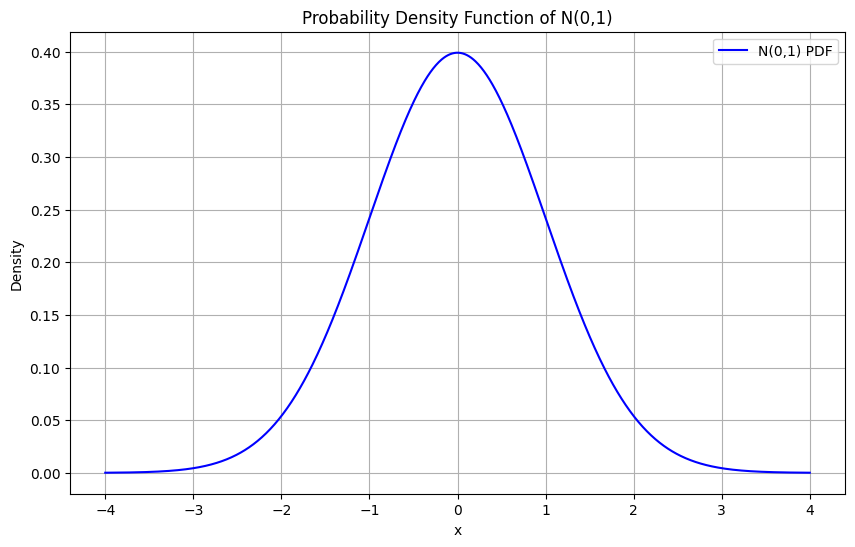

array([0.22988214, 0.39894228, 0.39862325, 0.22988214])

In [7]:
mean = 0
std_dev = 1

x = np.linspace(-4, 4, 1000)
pdf_values = stats.norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label='N(0,1) PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Probability Density Function of N(0,1)')
plt.grid(True)
plt.legend()
plt.show()

densities = stats.norm.pdf([-1.05, 0, 0.04, 1.05], mean, std_dev)
densities

6. Plot the standard normal cdf (Cumulative Distribution Function).

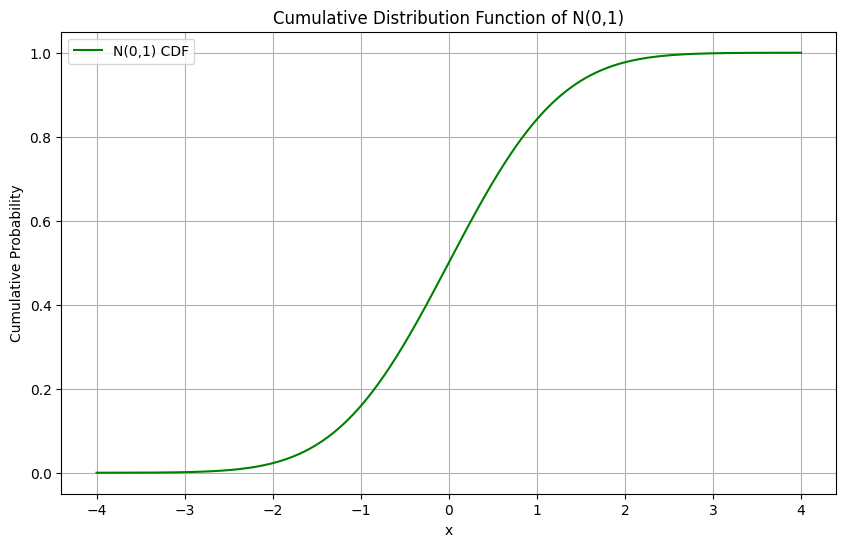

In [8]:
x = np.linspace(-4, 4, 1000)
cdf_values = stats.norm.cdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, cdf_values, label='N(0,1) CDF', color='green')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of N(0,1)')
plt.grid(True)
plt.legend()
plt.show()

7. Calculate P(Z ≤ 1.546) using the function pnorm() and using the actual definition
of cdf (integration formula, as we did in class). Confirm whether they give same
answers.

In [9]:
P_Z_1_546 = stats.norm.cdf(1.546)
P_Z_1_546

np.float64(0.9389477160894011)

8. Suppose Y ∼ N(6, 30). Using pnorm(), calculate P(5 ≤ Y ≤ 12).

In [ ]:
mean_Y = 6
std_Y = np.sqrt(30)

P_5 = stats.norm.cdf(5, mean_Y, std_Y)
P_12 = stats.norm.cdf(12, mean_Y, std_Y)

P_5_12 = P_12 - P_5
P_5_12


9. Plot the pdf of a chi-square distribution with 5 degrees of freedom. Add the cdf to
the plot. Add a legend to the plot.

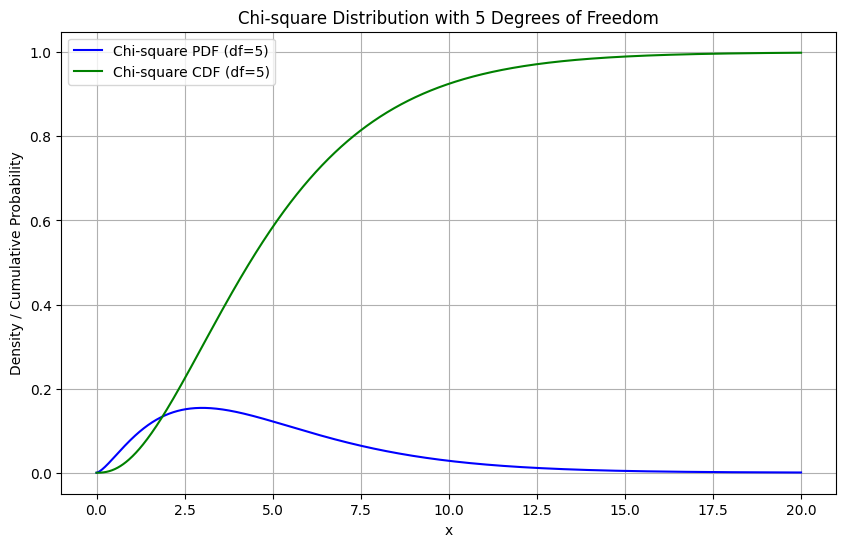

In [10]:
df = 5

x = np.linspace(0, 20, 1000)

pdf_values = stats.chi2.pdf(x, df)
cdf_values = stats.chi2.cdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label='Chi-square PDF (df=5)', color='blue')
plt.plot(x, cdf_values, label='Chi-square CDF (df=5)', color='green')
plt.xlabel('x')
plt.ylabel('Density / Cumulative Probability')
plt.title('Chi-square Distribution with 5 Degrees of Freedom')
plt.legend()
plt.grid(True)
plt.show()

10. As expectation and variance of chi-square distribution depend only on the degrees of
freedom, the distribution’s shape changes drastically if we vary the number of squared
standard normals that are summed up/the dof. To show that, plot the density for
dof=1. Add densities for n=2,3,4,...10 to the plot using a ‘for loop’. Add a legend.
What happens to the distribution’s mode and variance as you increase the dof?

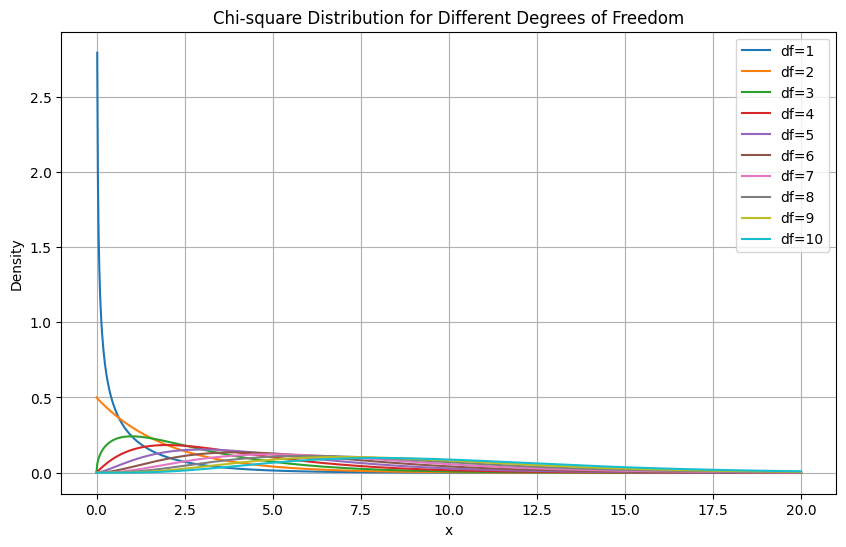

In [11]:
x = np.linspace(0, 20, 1000)
# linspace is alaways evenly spaced while for arrange you need to specify the step size.
plt.figure(figsize=(10, 6))

for dof in range(1, 11):
    pdf_values = stats.chi2.pdf(x, dof)
    plt.plot(x, pdf_values, label=f'df={dof}')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Chi-square Distribution for Different Degrees of Freedom')
plt.legend()
plt.grid(True)
plt.show()

11. The shape of a Student’s t distribution depends on dof n. For a sufficiently large n,
the tn distribution can be approximated by the standard normal distribution. This
approximation works reasonably well for n ≥ 30. You can plot some t distributions
with different n’s or dof and compare them to the standard normal distribution.
First, plot the standard normal density. Then, plot the t densities for t = 2, 10, 20, 25, 30, 50.
Add a legend. Compare the t-distributions and N(0, 1) as dof increase.

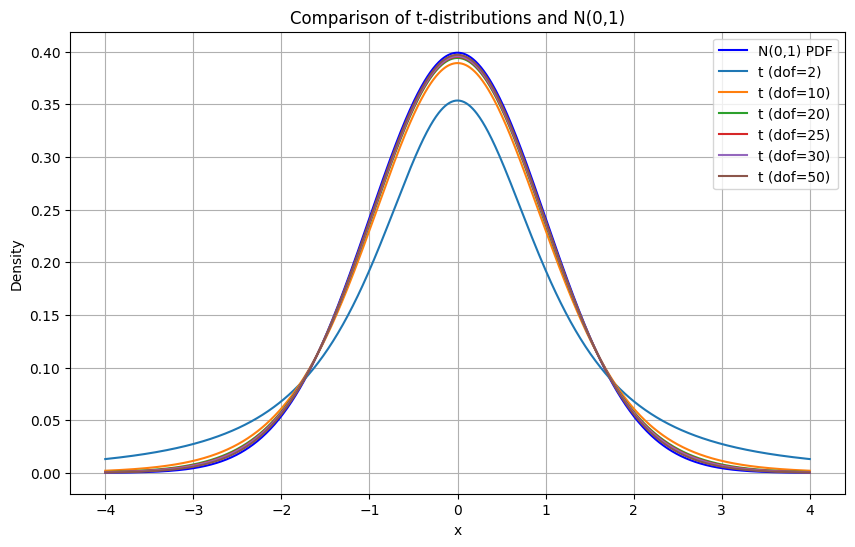

In [12]:
x = np.linspace(-4, 4, 1000)
std_normal_pdf = stats.norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, std_normal_pdf, label='N(0,1) PDF', color='blue')

dof_values = [2, 10, 20, 25, 30, 50]
for dof in dof_values:
    t_pdf = stats.t.pdf(x, dof)
    plt.plot(x, t_pdf, label=f't (dof={dof})')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Comparison of t-distributions and N(0,1)')
plt.legend()
plt.grid(True)
plt.show()

12. Suppose we have an F distributed random variable Y with numerator degrees of
freedom 4 and denominator degrees of freedom 20. Draw the density of F4,20. Also,
calculate P(Y ≥ 3).

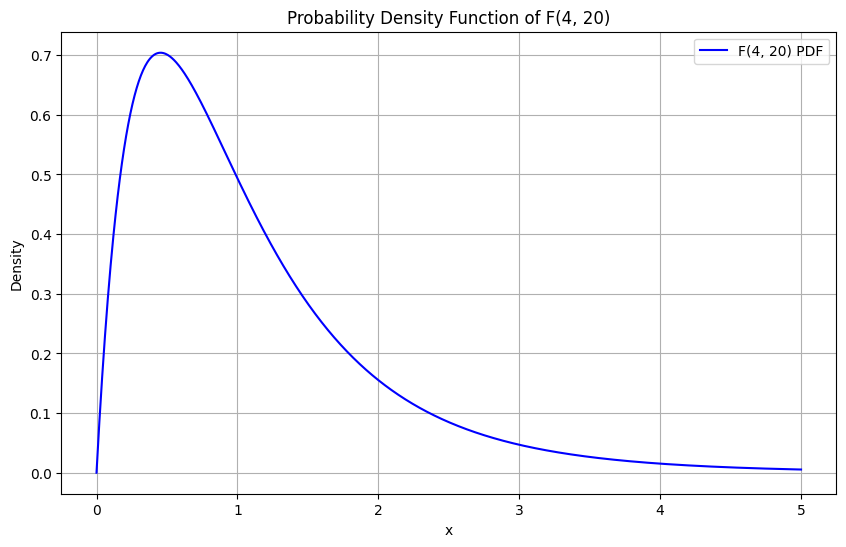

np.float64(0.04320099833421409)

In [14]:
numerator_dof = 4
denominator_dof = 20

x = np.linspace(0, 5, 1000)
pdf_values = stats.f.pdf(x, numerator_dof, denominator_dof)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label='F(4, 20) PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Probability Density Function of F(4, 20)')
plt.legend()
plt.grid(True)
plt.show()

P_Y_ge_3 = 1 - stats.f.cdf(3, numerator_dof, denominator_dof)
P_Y_ge_3


13. If a sample Yi with i = 1, . . . , 10 is drawn from a standard normal distribution
with mean μy = 0 and variance σ
2
y = 1, we have Y ̄ ∼ N(0, 0.1). We can use random
number generator to verify this result. The basic idea is to simulate outcomes of
the true distribution of Y by repeatedly drawing random samples of 10 observations
from the N (0, 1) distribution and computing their respective averages. If we do this
for a large number of repetitions, the simulated data set of averages should quite accurately reflect the theoretical distribution of Y if the theoretical result holds. The
approach mentioned above is an example of what is commonly known as Monte
Carlo Simulation. To perform this simulation in py (or any other language), proceed
as follows:

    1. Choose a sample size n = 10 and the number of samples to be drawn, reps = 10000.
    2. Use the function replicate() in conjunction with rnorm() to draw ‘n’ observations
        from the standard normal distribution ‘reps’ times. 
        Note: the outcome of replicate() is a matrix with dimensions ‘n × reps’. It contains
        the drawn samples as columns.
    3. Compute sample means using colMeans(). This function computes the mean of
        each column, i.e., of each sample and returns a vector. We then end up with a vector
        of sample averages.

        A straightforward approach to examine the distribution of univariate numerical data
        is to plot it as a histogram and compare it to some known or assumed distribution.
    4. Plot the density histogram of sample averages/means calculated in 3. Overlay the
        theoretical distribution of sample averages on top of the density histogram.
        What is your conclusion- Is the sampling distribution of Y ̄ very similar to a N(0, 0.1)
        distribution?

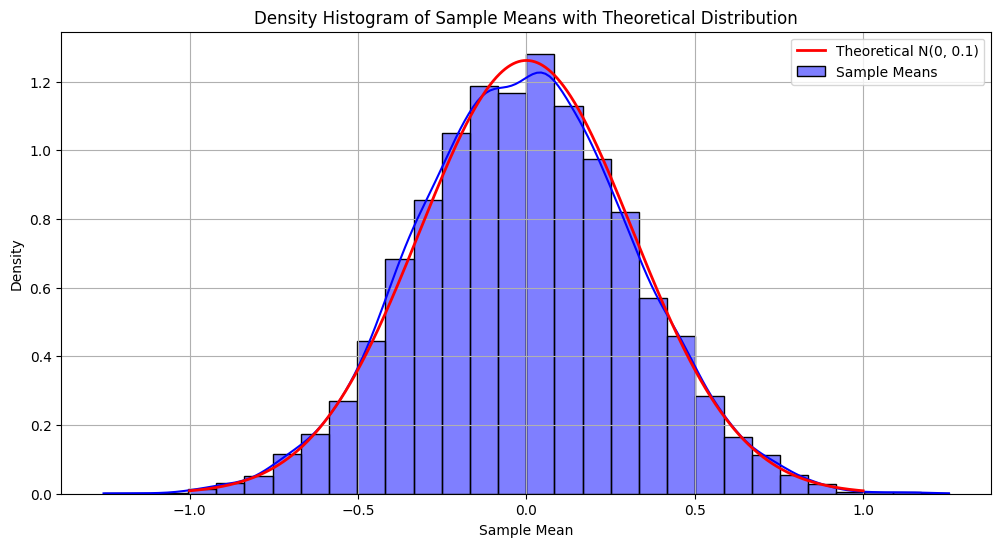

In [18]:
n = 10
reps = 10000

samples = np.random.normal(loc=0, scale=1, size=(n, reps))
sample_means = np.mean(samples, axis=0)

plt.figure(figsize=(12, 6))
sns.histplot(sample_means, bins=30, stat='density', kde=True, color='blue', alpha=0.5, label='Sample Means')

x = np.linspace(-1, 1, 1000)
y = stats.norm.pdf(x, loc=0, scale=np.sqrt(1/n))
plt.plot(x, y, 'r', lw=2, label='Theoretical N(0, 0.1)')

plt.title('Density Histogram of Sample Means with Theoretical Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()
